In [104]:
import pandas as pd
import numpy as np
import requests
from time import time

#dataprocessing lib

from sklearn import preprocessing

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
import re
warnings.filterwarnings('ignore')




#Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [2]:
pip install tensorflow

IMPORTING DATASET FROM LOCAL MACHINE

In [105]:
books = pd.read_csv('/content/BRS.csv')


In [106]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6585 entries, 0 to 6584
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6585 non-null   int64  
 1   book_id         6585 non-null   int64  
 2   title           6585 non-null   object 
 3   author          6585 non-null   object 
 4   average_rating  6585 non-null   float64
 5   genre           6585 non-null   object 
 6   description     6584 non-null   object 
 7   url             6585 non-null   object 
 8   image_url       6585 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 463.1+ KB


In [108]:
books.shape

(6585, 9)

## Exploratory Data Analysis

In [110]:
books.isnull().sum()

Unnamed: 0        0
book_id           0
title             0
author            0
average_rating    0
genre             0
description       1
url               0
image_url         0
dtype: int64

In [111]:
is_NaN = books.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = books[row_has_NaN]
rows_with_NaN


,Unnamed: 0,book_id,title,author,average_rating,genre,description,url,image_url
6567,6567,117531,Dark Night of the Soul,John of the Cross,4.1,Religion,NaN,https://www.goodreads.com/book/show/117531.Dar...,https://i.gr-assets.com/images/S/compressed.ph...


In [112]:
books= books.drop(6567)

In [113]:
books.isnull().sum()

Unnamed: 0        0
book_id           0
title             0
author            0
average_rating    0
genre             0
description       0
url               0
image_url         0
dtype: int64

In [115]:
books.duplicated().sum()

0

In [117]:
#Genre Value Count
books.genre.value_counts()

Fiction            1372
Fantasy             734
Nonfiction          678
Classics            425
Young Adult         340
                   ... 
Gothic                1
Christianity          1
Northern Africa       1
Humanities            1
Race                  1
Name: genre, Length: 101, dtype: int64

### Genre Distribution

###Showing Top 20 Genres

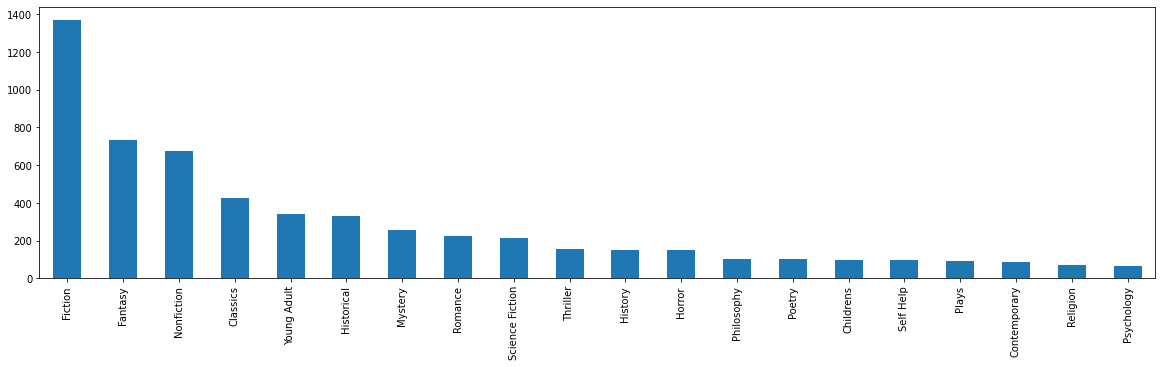

In [141]:
books['genre'].value_counts().nlargest(20).plot(x='genre',y = 'count',kind = 'bar',figsize = (20,5))

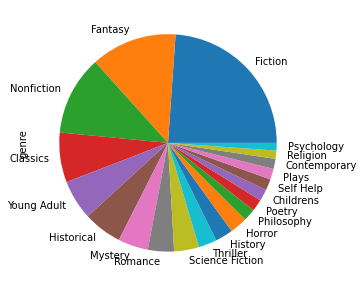

In [140]:
books['genre'].value_counts().nlargest(20).plot(x='genre',y = 'count',kind = 'pie',figsize = (20,5))

###Balancing Data

In [142]:
books.duplicated().sum()

0

###Word Count

<Figure size 864x720 with 0 Axes>

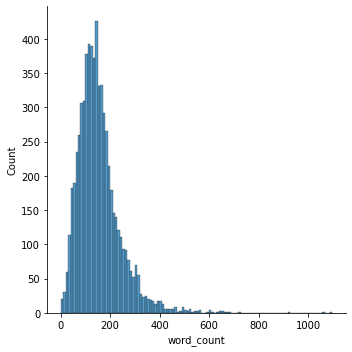

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

books['word_count'] = books['description'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=[12, 10])
sns.displot(books['word_count'])


In [148]:
books.head()

,Unnamed: 0,book_id,title,author,average_rating,genre,description,url,image_url,word_count
0,0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137
1,1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220
2,2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100
3,3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166
4,4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123


## DataPreprocessing

In [149]:
books['genre'].unique()

array(['Classics', 'Fantasy', 'Nonfiction', 'Historical', 'Fiction',
       'Young Adult', 'Childrens', 'Science Fiction', 'Poetry', 'Horror',
       'Religion', 'History', 'Mystery', 'Travel', 'Romance',
       'Philosophy', 'Thriller', 'Sequential Art', 'Academic', 'Science',
       'Self Help', 'Language', 'Plays', 'Christian', 'Contemporary',
       'Drama', 'Autobiography', 'Esoterica', 'Short Stories', 'Crime',
       'Psychology', 'Feminism', 'Christian Fiction', 'Biography',
       'Business', 'Novels', 'Paranormal', 'Apocalyptic', 'Inspirational',
       'Economics', 'Spirituality', 'Epic', 'Book Club', 'Marriage',
       'Education', 'Humor', 'Art', 'Politics', 'Polyamorous',
       'Womens Fiction', 'Health', 'New Adult', 'Erotica',
       'Shapeshifters', 'War', 'Design', 'Cultural', 'Adult', 'Parenting',
       'Realistic Fiction', 'Gender', 'Gothic', 'Animals', 'LGBT',
       'Modern', 'Literature', 'Music', 'Dark', 'Leadership', 'Adventure',
       'Suspense', 'Westerns'

In [150]:
#removing multiple genres which are greater than 100
df = books[books['genre'].map(books['genre'].value_counts()) > 100]

In [151]:
df['genre'].value_counts()

Fiction            1372
Fantasy             734
Nonfiction          678
Classics            425
Young Adult         340
Historical          331
Mystery             257
Romance             223
Science Fiction     213
Thriller            156
History             151
Horror              150
Philosophy          104
Poetry              101
Name: genre, dtype: int64

In [152]:
# Making a sub dataframe of fiction books with under 160 word count.
# As depiction is our fundamental measures for model precision and forecast , we are eliminating the books which has low word count.
df2 = df[(df.genre == 'Fiction') & (df.word_count <= 160)]
# Dropping the lines made in df2 from the df segment.
df.drop(df2.index,axis=0,inplace=True)

In [153]:
df.genre.value_counts()

Fantasy            734
Nonfiction         678
Fiction            499
Classics           425
Young Adult        340
Historical         331
Mystery            257
Romance            223
Science Fiction    213
Thriller           156
History            151
Horror             150
Philosophy         104
Poetry             101
Name: genre, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea98443390>],
      dtype=object)

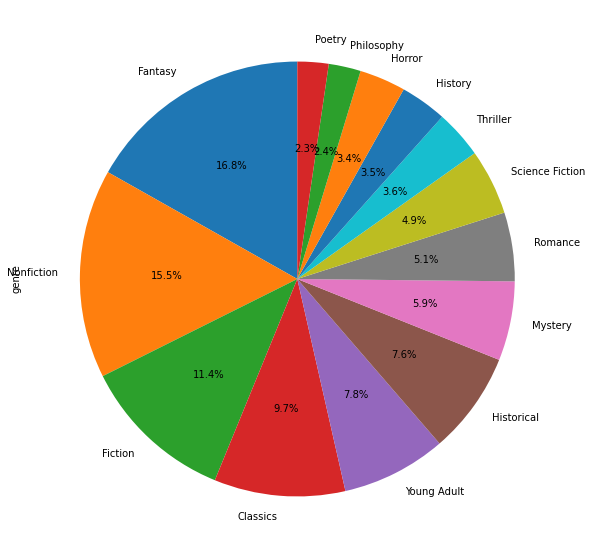

In [158]:
df.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [160]:
# Checking curse words

le = preprocessing.LabelEncoder()
le_fit = le.fit_transform(df.genre)
df['genre_le'] = le.fit_transform(df.genre)


In [161]:
le_fit

array([ 0,  1,  0, ...,  0, 13,  4])

In [162]:
df['author'] = df['author'].str.replace(" ","")
df['tags'] = df['author'] + " " + df['title'] + " " + df['description']
df.drop(['word_count', 'author', 'description'], axis=1, inplace=True)



In [163]:
#Regularized Text
#stemming
ps = PorterStemmer()
def clean_summary(text):
   
    text = re.sub('\W+', ' ', text)
    text = text.lower() 
   
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)


In [164]:
df['tags'] = df['tags'].apply(clean_summary)
df.sample(10)

,Unnamed: 0,book_id,title,average_rating,genre,url,image_url,genre_le,tags
3795,3795,32149989,Revel,4.83,Poetry,https://www.goodreads.com/book/show/32149989-r...,https://i.gr-assets.com/images/S/compressed.ph...,9,michaelindemaio revel michael indemaio is a mo...
2109,2109,125190,Swallows and Amazons,3.98,Classics,https://www.goodreads.com/book/show/125190.Swa...,https://i.gr-assets.com/images/S/compressed.ph...,0,arthurransom swallow and amazon the first titl...
2343,2343,15842439,Warm Bodies,3.91,Romance,https://www.goodreads.com/book/show/15842439-w...,https://i.gr-assets.com/images/S/compressed.ph...,10,isaacmarion warm bodi now a major motion pictu...
5012,5012,7544603,Smaragdgrün,4.17,Fantasy,https://www.goodreads.com/book/show/7544603-sm...,https://i.gr-assets.com/images/S/compressed.ph...,1,kerstingi smaragdgrün gwendolyn ist am boden z...
2205,2205,16331,Murder at the Vicarage,4.06,Mystery,https://www.goodreads.com/book/show/16331.Murd...,https://i.gr-assets.com/images/S/compressed.ph...,6,agathachristi murder at the vicarag anyon who ...
886,886,10603,Cujo,3.75,Horror,https://www.goodreads.com/book/show/10603.Cujo,https://i.gr-assets.com/images/S/compressed.ph...,5,stephenk cujo outsid a peac town in central ma...
6474,6474,39028,The Wheel of Darkness,3.95,Thriller,https://www.goodreads.com/book/show/39028.The_...,https://i.gr-assets.com/images/S/compressed.ph...,12,douglaspreston the wheel of dark at a remot mo...
2152,2152,32978448,The Last Valentine,4.09,Romance,https://www.goodreads.com/book/show/32978448-t...,https://i.gr-assets.com/images/S/compressed.ph...,10,felixalexand the last valentin when olivia vil...
43,43,1381,The Odyssey,3.78,Classics,https://www.goodreads.com/book/show/1381.The_O...,https://i.gr-assets.com/images/S/compressed.ph...,0,homer the odyssey sing to me of the man muse t...
3256,3256,43841,When Christ and His Saints Slept,4.21,Historical,https://www.goodreads.com/book/show/43841.When...,https://i.gr-assets.com/images/S/compressed.ph...,3,sharonkaypenman when christ and hi saint slept...


In [165]:
#relegate the free highlights (text) to X variable and the objective to y
X = pd.DataFrame(df['tags'])
y = df['genre_le']

In [166]:
y

0        0
1        1
2        0
3        7
4        0
        ..
6579     0
6580     1
6582     0
6583    13
6584     4
Name: genre_le, Length: 4362, dtype: int64

In [167]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [168]:
y.value_counts()

1     734
7     678
2     499
0     425
13    340
3     331
6     257
10    223
11    213
12    156
4     151
5     150
8     104
9     101
Name: genre_le, dtype: int64

In [169]:
#Oversampling
strategy = {0:500, 1:734, 2:500, 3:500, 4:500, 5:500,6:500,7:678,8:500,9:500,10:500,11:500,12:500,13:500}
os = RandomOverSampler(sampling_strategy = strategy)

In [170]:
X_rs, y_rs = os.fit_resample(X,y)

In [172]:
from collections import Counter
print(Counter(y))

Counter({1: 734, 7: 678, 2: 499, 0: 425, 13: 340, 3: 331, 6: 257, 10: 223, 11: 213, 12: 156, 4: 151, 5: 150, 8: 104, 9: 101})


In [173]:
print(Counter(y_rs))

Counter({1: 734, 7: 678, 0: 500, 3: 500, 13: 500, 11: 500, 9: 500, 2: 500, 5: 500, 4: 500, 6: 500, 10: 500, 8: 500, 12: 500})


In [174]:
#Undersampling
strategy = {0:500, 1:500, 2:500, 3:500, 4:500, 5:500,6:500,7:500,8:500,9:500,10:500,11:500,12:500,13:500}
us = RandomUnderSampler(sampling_strategy = strategy)

In [175]:
X_new, y_new = us.fit_resample(X_rs,y_rs)

In [176]:
print(Counter(y_new))

Counter({0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500})


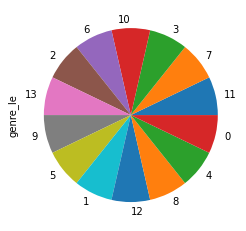

In [178]:
y_new.value_counts().plot(x='y_new',y = 'count',kind = 'pie')

In [179]:
y_new.shape

(7000,)

## Split the dataset into Train and Test sets

In [180]:
#Training 70% and Test 30%
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.30)

In [181]:
X_train.head()

,tags
6844,jennydownham befor i die the stori of tessa a ...
5988,clairenorth the first fifteen live of harri au...
4571,dorothypark the collect dorothi parker dorothi...
3017,ellenraskin the west game a bizarr chain of ev...
6026,tayloradam no exit a thriller about four stran...


In [182]:
x_train = X_train.iloc[:,0]
x_train.head()

6844    jennydownham befor i die the stori of tessa a ...
5988    clairenorth the first fifteen live of harri au...
4571    dorothypark the collect dorothi parker dorothi...
3017    ellenraskin the west game a bizarr chain of ev...
6026    tayloradam no exit a thriller about four stran...
Name: tags, dtype: object

## CountVectorizer - Feature Extraction

In [183]:
#Removing Stopwords
cv = CountVectorizer(max_features = 10000,stop_words = 'english')

In [184]:
x = cv.fit_transform(x_train).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [185]:
x_test = X_test.iloc[:,0]
x_test.head()

1411    katrinschumann the forgotten hour in thi evoc ...
4266    benjaminhoff the te of piglet in which a good ...
5117    cassidystorm girl talk autumn is stuck in a ru...
185     dodiesmith i captur the castl through six turb...
454     williamblak song of innoc and of experi song o...
Name: tags, dtype: object

In [186]:
test_x = cv.transform(x_test).toarray()
test_x.shape

(2100, 10000)

## Model Tuning

In [187]:
# For showing output in table format
training_time = []
predicting_time = []
accuracy_scores = []
train_accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [188]:
model1 = MultinomialNB()

In [190]:
#Training time
t0 = time()
model1.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 13.974 s



In [191]:
# Predicting 
t1 = time()
predicted = model1.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred1 = model1.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred1))

Predicting time: 0.382 s


Accuracy Score for training data:  0.9636734693877551


In [193]:
## Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))




Accuracy Score 0.800952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       157
           1       0.73      0.73      0.73       142
           2       0.48      0.60      0.54       162
           3       0.76      0.72      0.74       154
           4       0.84      0.92      0.88       146
           5       0.93      0.90      0.91       146
           6       0.88      0.83      0.85       151
           7       0.77      0.70      0.73       140
           8       0.96      0.98      0.97       151
           9       0.95      0.93      0.94       143
          10       0.75      0.88      0.81       147
          11       0.93      0.82      0.87       143
          12       0.81      0.88      0.84       169
          13       0.76      0.68      0.72       149

    accuracy                           0.80      2100
   macro avg       0.81      0.80      0.80      2100
weighted avg       0.8

In [194]:
model2 = GaussianNB()

In [195]:
#Predicting
t0 = time()
model2.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 1.716 s



In [196]:
# Prediting
t1 = time()
predicted = model2.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))
# Predicting train data.
train_pred2 = model2.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred2))

Predicting time: 2.705 s


Accuracy Score for training data:  0.9636734693877551


In [197]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.7352380952380952
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.41      0.53       157
           1       0.69      0.58      0.63       142
           2       0.25      0.56      0.34       162
           3       0.76      0.60      0.67       154
           4       0.93      0.94      0.93       146
           5       0.98      0.90      0.94       146
           6       0.91      0.78      0.84       151
           7       0.43      0.65      0.52       140
           8       0.99      0.99      0.99       151
           9       0.97      0.97      0.97       143
          10       0.93      0.78      0.85       147
          11       0.88      0.79      0.83       143
          12       0.97      0.80      0.88       169
          13       0.84      0.57      0.68       149

    accuracy                           0.74      2100
   macro avg       0.81      0.74      0.76      2100
weighted avg       0.

In [198]:
model3 = tree.DecisionTreeClassifier()

In [199]:
#Predicting
t0 = time()
model3.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 15.001 s



In [200]:
# Predicting
t1 = time()
predicted = model3.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred3 = model3.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred3))

Predicting time: 0.081 s


Accuracy Score for training data:  0.9636734693877551


In [202]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.6895238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47       157
           1       0.48      0.39      0.43       142
           2       0.33      0.22      0.27       162
           3       0.59      0.60      0.60       154
           4       0.84      0.92      0.88       146
           5       0.88      0.94      0.91       146
           6       0.75      0.77      0.76       151
           7       0.38      0.27      0.32       140
           8       0.82      0.99      0.90       151
           9       0.92      0.96      0.94       143
          10       0.75      0.81      0.78       147
          11       0.80      0.87      0.84       143
          12       0.77      0.88      0.82       169
          13       0.55      0.58      0.56       149

    accuracy                           0.69      2100
   macro avg       0.67      0.69      0.68      2100
weighted avg       0.

In [64]:
model5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [203]:
#Predicting
t0 = time()
model5.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 0.006 s



In [204]:
# Predicting
t1 = time()
predicted = model5.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred5 = model5.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred5))

Predicting time: 10.234 s


Accuracy Score for training data:  0.9636734693877551


In [205]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.3547619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.89      0.20       157
           1       0.41      0.08      0.13       142
           2       1.00      0.01      0.02       162
           3       0.56      0.20      0.30       154
           4       0.66      0.58      0.61       146
           5       0.66      0.51      0.58       146
           6       0.75      0.18      0.29       151
           7       0.00      0.00      0.00       140
           8       0.65      0.79      0.71       151
           9       0.81      0.71      0.76       143
          10       0.89      0.27      0.42       147
          11       0.54      0.29      0.37       143
          12       0.84      0.37      0.51       169
          13       0.65      0.09      0.15       149

    accuracy                           0.35      2100
   macro avg       0.61      0.35      0.36      2100
weighted avg       0.

In [206]:
model6 = LogisticRegression(max_iter=2000)

In [207]:
#Predicting
t0 = time()
model6.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 72.895 s



In [208]:
# Predicting
t1 = time()
predicted = model6.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred6 = model6.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred6))

Predicting time: 0.147 s


Accuracy Score for training data:  0.9636734693877551


In [209]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.8233333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       157
           1       0.77      0.71      0.74       142
           2       0.64      0.48      0.55       162
           3       0.72      0.77      0.74       154
           4       0.90      0.97      0.93       146
           5       0.90      0.97      0.93       146
           6       0.83      0.87      0.85       151
           7       0.78      0.64      0.70       140
           8       0.94      0.99      0.97       151
           9       0.96      0.94      0.95       143
          10       0.79      0.91      0.85       147
          11       0.87      0.91      0.89       143
          12       0.89      0.86      0.88       169
          13       0.76      0.72      0.74       149

    accuracy                           0.82      2100
   macro avg       0.82      0.83      0.82      2100
weighted avg       0.

In [210]:
model7 = SVC(kernel='linear',gamma='auto')

In [211]:
#Predicting
t0 = time()
model7.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 205.217 s



In [212]:
# Predicting
t1 = time()
predicted = model7.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred7 = model7.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred7))

Predicting time: 73.893 s


Accuracy Score for training data:  0.9636734693877551


In [213]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.8219047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       157
           1       0.69      0.69      0.69       142
           2       0.60      0.58      0.59       162
           3       0.79      0.77      0.78       154
           4       0.92      0.96      0.94       146
           5       0.92      0.97      0.94       146
           6       0.86      0.87      0.86       151
           7       0.77      0.60      0.67       140
           8       0.97      0.99      0.98       151
           9       0.95      0.96      0.95       143
          10       0.81      0.88      0.84       147
          11       0.89      0.92      0.90       143
          12       0.92      0.85      0.89       169
          13       0.74      0.74      0.74       149

    accuracy                           0.82      2100
   macro avg       0.82      0.82      0.82      2100
weighted avg       0.

In [214]:
from keras.wrappers.scikit_learn import KerasClassifier

# create model
def create_model():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model8.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model8.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model8

# Create the model

model8 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )

In [215]:
t0 = time()
nn = model8.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 58.939 s



In [217]:
t1 = time()
pred = model8.predict(test_x).round(1) 
predicting_time.append(round(time()-t1, 3))

print(pred[0:5]) 

# Predicting data.
train_pred8 = model8.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred8))


[[1]
 [1]
 [1]
 [1]
 [1]]

Accuracy Score for training data:  0.9636734693877551


In [218]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,pred))

accuracy_scores.append(accuracy_score(y_test,pred).round(2))

print("Classification Report:\n",classification_report(y_test, pred))
clf_rep = precision_recall_fscore_support(y_test,pred)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, pred))



Accuracy Score 0.06761904761904762
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.07      1.00      0.13       142
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00       146
           6       0.00      0.00      0.00       151
           7       0.00      0.00      0.00       140
           8       0.00      0.00      0.00       151
           9       0.00      0.00      0.00       143
          10       0.00      0.00      0.00       147
          11       0.00      0.00      0.00       143
          12       0.00      0.00      0.00       169
          13       0.00      0.00      0.00       149

    accuracy                           0.07      2100
   macro avg       0.00      0.07      0.01      2100
weighted avg       0

In [219]:
model4 = RandomForestClassifier(max_depth=2, random_state=0)

In [220]:
#Predicting
t0 = time()
model4.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 1.936 s



In [221]:
# Predicting
t1 = time()
predicted = model4.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

# Predicting train data.
train_pred4 = model4.predict(x)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred4))

Predicting time: 0.172 s


Accuracy Score for training data:  0.9636734693877551


In [222]:
##Model Evaluation on the basis of - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.4176190476190476
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.12      0.20       157
           1       0.21      0.40      0.27       142
           2       1.00      0.01      0.02       162
           3       0.71      0.08      0.14       154
           4       0.40      0.76      0.52       146
           5       0.61      0.36      0.45       146
           6       0.40      0.76      0.53       151
           7       0.24      0.34      0.28       140
           8       0.58      0.60      0.59       151
           9       0.61      0.87      0.72       143
          10       0.39      0.55      0.46       147
          11       0.45      0.58      0.51       143
          12       0.78      0.23      0.36       169
          13       0.37      0.28      0.32       149

    accuracy                           0.42      2100
   macro avg       0.52      0.43      0.38      2100
weighted avg       0.

In [227]:
model_name = ['Multinomial Bayes','Gaussian Bayes','Decision Tree','RandomForest','KNN','Logistic Regression','SVM','Neural Network']

In [257]:
performance_table

,Model_name,Training time,Prediction time,Test Accuracy,Train Accuracy,Precision,Recall,F1-scores
0,Multinomial Bayes,12.069,0.097,0.83,0.963571,0.75,0.71,0.73
5,Logistic Regression,206.655,49.789,0.84,1.000000,0.66,0.80,0.72
4,KNN,59.210,0.121,0.83,1.000000,0.67,0.74,0.71
1,Gaussian Bayes,0.909,1.355,0.78,0.994643,0.78,0.52,0.62
2,Decision Tree,10.939,0.041,0.73,1.000000,0.46,0.50,0.48
7,Neural Network,1.443,0.076,0.46,0.471786,0.38,0.35,0.36
3,RandomForest,0.007,5.097,0.38,0.547857,0.11,0.91,0.20
6,SVM,82.861,0.235,0.07,0.071071,0.00,0.00,0.00


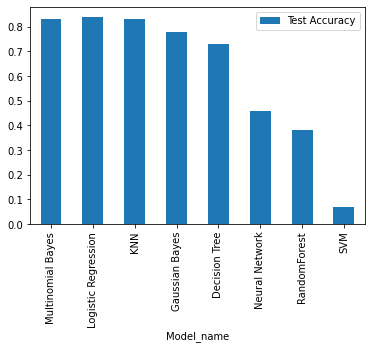

In [259]:
performance_table.plot(x="Model_name", y="Test Accuracy", kind="bar")

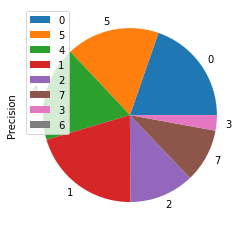

In [266]:
performance_table.plot(x="Model_name", y="Precision", kind="pie")

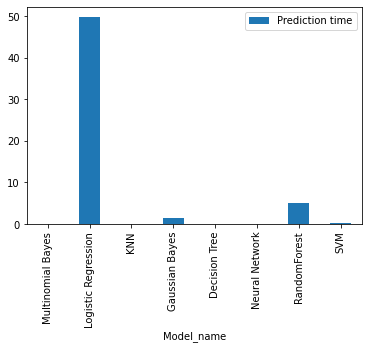

In [265]:
	performance_table.plot(x="Model_name", y="Prediction time", kind="bar")

##Predicting Model

In [233]:
rec = ["Being a teenager is both wonderful and challenging. In The 7 Habits of Highly Effective Teens, author Sean Covey applies the timeless principles of the 7 Habits to teens and the tough issues and life-changing decisions they face. In an entertaining style, Covey provides a step-by-step guide to help teens improve self-image, build friendships, resist peer pressure, achieve their goals, get along with their parents, and much more. In addition, this book is stuffed with cartoons, clever ideas, great quotes, and incredible stories about real teens from all over the world. The 7 Habits of Highly Effective Teens will engage teenagers unlike any other book.An indispensable book for teens, as well as parents, grandparents, and any adult who influences young people, The 7 Habits of Highly Effective Teens is destined to become the last word on surviving and thriving as a teen and beyond."]

In [234]:
t = cv.transform(rec).toarray()

In [235]:
pr = le.inverse_transform(model1.predict(t))


In [236]:
pr[0]

'Nonfiction'

## Predicting Recommendation

In [237]:
def recommend(genre):
    recommended_books = df[df['genre'] == genre].sort_values(by = 'average_rating',ascending = False).head()
    print(recommended_books.title)
        
    return
    

In [239]:
recommend('Nonfiction')

209                               The Addiction Manifesto
4720                                           Into Exile
4996    THE BOOK THAT HAPPENED – Is Reality but Sheer ...
5123                                Annihilation of Caste
3492                                 To Selena, With Love
Name: title, dtype: object


## Exporting PKL files

In [240]:
import pickle

pickle.dump(model1,open('bookmodel.pkl','wb'))
pickle.dump(df,open('books.pkl','wb'))
pickle.dump(cv,open('CountVectorizer.pkl','wb'))

## Instruction for app.py

In [241]:
rec = [clean_summary('Andy Dufresne, a banker, was convicted of killing his wife and her lover and sent to Shawshank Prison. He maintains his innocence over the decades he spends at Shawshank during which time he forms a friendship with "Red", a fellow inmate.Source: stephenking.com')]
rec



['andi dufresn a banker wa convict of kill hi wife and her lover and sent to shawshank prison he maintain hi innoc over the decad he spend at shawshank dure which time he form a friendship with red a fellow inmat sourc stephenk com']

In [242]:
tags= pd.DataFrame({'tags': rec})
df_tags = df[['tags']]


In [243]:
tags = tags.append(df_tags,ignore_index=True)


In [244]:
tags

,tags
0,andi dufresn a banker wa convict of kill hi wi...
1,harperle to kill a mockingbird the unforgett n...
2,j k rowl harri potter and the sorcer s stone h...
3,janeausten pride and prejudic altern cover edi...
4,annefrank the diari of a young girl discov in ...
...,...
4358,katedouglaswiggin rebecca of sunnybrook farm f...
4359,georger r martin fevr dream when struggl river...
4360,molièr le bourgeoi gentilhomm le bourgeoi gent...
4361,laurenk fallen in love and in a twist of fate ...


In [245]:
tags_test_cv = cv.fit_transform(tags['tags']).toarray()
tags_test_cv


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [246]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_tags = cosine_similarity(tags_test_cv)


In [248]:
similarity_tags[0]

array([1.        , 0.10830607, 0.20911862, ..., 0.        , 0.03745029,
       0.01349996])

In [249]:
recommended_sorted_list = sorted(list(enumerate(similarity_tags[0])),reverse= True,key= lambda x:x[1])[1:6]
recommended_sorted_list
recommended_books = []
recommended_book_posters = []
for i in recommended_sorted_list:
    recommended_books.append(df.iloc[i[0]].title)
    recommended_book_posters.append(df.iloc[i[0]].image_url)


In [250]:
recommended_books

['Crucial Lessons',
 'Among the Hidden',
 'The Summons',
 'Death & the Zombie Apocalypse',
 'The Goose Girl']